In [1]:
using Gadfly

# *Parallel computing*

The dataset being analysed is a big data set the which is collectively about **~70GB**. The first barrier before doing any analysis was to be able to read the data quickly and efficiently.

We started off by experimenting with the ***DataFrames*** package the output dataframe had all the required properties and was easy to manipulate but the reading of the file took to long also the **DateTime** type was being read as string and extracting information such as time/date using string manipulation only made the process really slow. Hence we switched to ***CSV*** module, it had a better performance in reading the data  but the output dataframe had the type of **NullableArrays**. This was not in our favour as most of the functions to manipulate the dataframes do not work with the  collumns which had **Nullable** type. Hence we wrote a ***type*** which could read a dataframe using ***CSV.read()*** and the convert it into another DataFrame in which columns were tyepe stable and not the **NullableArray**. This gave us overall better performance than using only DataFrames.

Now even loading all the data sequentially would have been very time consuming as each file is big enough to take a significant amount of time. This is where the parallel computing feature of **JULIA** comes in handy.We introduced the ***@everywhere*** macros and used ***SharedArrays*** and ***DistributedArrays (DArrays)*** which allows to map the function on different processors of the system and collect output from these parallel process.Hence it helps us to avoid following the sequential order and do it one by one hence we were able to load all the data in about as much time as it takes to load one dataset with maximum loading time.

This feature also helped us to *parallelize* many function which used multiple files for the analysis and plotting of the graph. Also, in one of the analysis we were to cluster the *latitudes and longitudes* we used ***Clustering*** packge for this and used the inbuilt **K-means** function to implement the *k-means algorithm*, we were able to put all the files in parallel for the process of finding the k-means hence were able to save time there too by avoiding the sequential process.

Here we demonstrate the parallel computing capabilitiesof ***JULIA*** by calculating the value of *pi* using ***Monte Carlo*** simulation with ***10 Billion*** sample points. The number of workers assigned was made to vary to measure the exectution time :

In [16]:
#this script is to estimate pi using monte Carlo simulation
function parallel_findpi(n)
    inside =  @parallel (+) for i = 1:n
        x, y = rand(2)
        x^2 + y^2 <= 1 ? 1 : 0
    end
    4 * inside / n
end

parallel_findpi (generic function with 1 method)

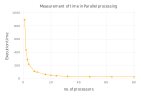

In [17]:

time = [893.081954, 437.424609, 288.011919, 219.332380,
    111.764335,98.156851,63.623772,51.070448,43.202897,34.187504,28.481205, 26.948234,26.782099]

nprocs=[1,2,3,4,8,10,16,20,24,32,48,64,80]

plot(x=nprocs,y=time, Geom.point, Geom.line, Theme(default_color=color("orange")),
Guide.xlabel("no. of processors"), Guide.ylabel("Execution time"),
Guide.title("Measurement of time in Parallel processing"))

# *Maps*

The following section has been plotted using hexbins feature of ***Gadfly-Julia***.The plot consists of latitudes on Y-axis and longitudes on X-axis.These maps plots pickup and dropoff location of every taxi ride taken between Aug'13 to Dec'2015. Using this data we can see that we can infer about the map of NY city, without atually using any map features/API.

In [29]:
HTML("""<img src="Images/green_pickup.png"></img> """)

HTML{String}("<img src=\"Images/green_pickup.png\"></img> ")

In [23]:
HTML("""<img src="Images/green_dropoff.png"></img> """)

HTML{String}("<img src=\"Images/green_dropoff.png\"></img> ")

In [21]:
HTML("""<img src="Images/yellow_dropoff.png"></img> """)

HTML{String}("<img src=\"Images/yellow_dropoff.png\"></img> ")

In [24]:
HTML("""<img src="Images/yellow_pickup.png"></img> """)

HTML{String}("<img src=\"Images/yellow_pickup.png\"></img> ")

# Pick-ups analysis
In the following graph we anallyse the pick up trends for the yellow taxis, which has two vendors. Few intresting features crop up such as there is a clear dropping in the pick ups for both the vendors over time implying the degradation in popularity of yellow taxis over time. Also both the pick ups for both the vendors seems to co-related.

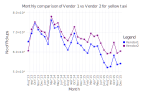

In [18]:
include("Graphs/yellow_taxi_monthly_analysis.jl")

In the following graph we analyse the pickup trends for the green taxi which were introduced in August 2013 in NY. The analysis is over few months from 2013 to 2015. There are **two vendors** for the green taxi labelled as Vendor1 and Vendor2. As can be seen *Vendor2* has much higher growth rate in the early stages. This has led to more number of the pickups by vendor2 over time. Both the vendors tend to stabalise about an *equillibrium* value over time.

We can see that as green taxis has gain popularity over time yellow taxi has lost its popularity in the same time.

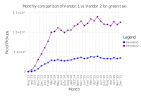

In [3]:
include("Graphs/green_taxi_monthly_analysis.jl")

This graph shows the comparison between **vendor1 and vendor2 of yellow taxi**<br>
over all days of week for the month of january 2015. It clearly projects the domination of vendor2 over vendor1.<br>
Another fact which crops up is the frequencies of taxies rises as the weekdays past by<br>
it is peaked on **saturday** and it drops sharply on ***sunday (as it is a holiday)***.<br>

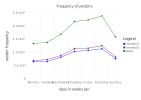

In [4]:
include("Graphs/vendorweekly.jl")

The following graph presents the comparison of the two vendors of the yellow taxi
 in per hour basis. Rush hours can be deduced from the graph it is from about **6:00 PM to 9:00 PM.** This can be justified as it is the time around which most of the people will be coming back from the office.<br>
The global minimum at about **6:00 AM** in the morning gives an idea that very small fraction of the working class actually have to start travelling as early as 6 in the morning.<br>

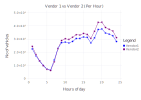

In [5]:
include("Graphs/vendorperhour.jl")

The following graph shows the comparison between vendor1 and vendor2 on the weekdays. As can be seen the peak hours for both the vendors is from 6:00PM to 9:00PM and it, decreases afterwards hitting a minima at early morning.

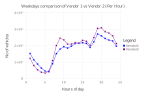

In [6]:
include("Graphs/vendorperhourweekdays.jl")

The following graph shows the comparison between the two vendors of the yellow taxi on the *weekends*.<br>
A clear feature which crops up which is different than the normal weekdays is during dayhours the frequency<br>
of both the vendors become more or less stagnant.<br>
Also contrary to weekdays we see a sharp rise in the taxi uses for both the vendors late in night<br>
**(12:00 AM to 1:00 AM)** on weekends, this takes into account the fact that many people on weekends stay out till 
late in night in new york.

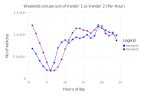

In [7]:
include("Graphs/vendorperhourweekend.jl")

Here we present the one to one comparison for the total number of pickups for the **yellow** taxis as a whole and **green** taxis as a whole. As can be seen from the graph, after the introduction of the green taxis in **Aug'13** they have steadily increased and saturated about an equillibrium value *(look at the gif providing the visuals of the spreading of the green taxis)*, which is way below the mean value of the yellow taxi pick ups which apart from some *seasonal trends* are more or less have decreased a bit and saturated.

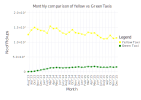

In [8]:
include("Graphs/total_pickups.jl")

In [34]:
HTML("""
<img src="Images/green_pickup_heatmap.gif"></img>
""")

HTML{String}("<img src=\"Images/green_pickup_heatmap.gif\"></img>\n")

The following is the gif which shows the variation of dropoff locations for the green taxis over years

In [35]:
HTML("""
<img src="Images/green_dropoff_heatmap.gif"></img>
""")

HTML{String}("<img src=\"Images/green_dropoff_heatmap.gif\"></img>\n")

To extract some of the prime locations (hotspots) around which most of the pickups and dropoffs
are concentrated,<br> we clustered the *latitudes and longitudes* of all the pickup and drop off points,
using the **K-means** algorithm (a type of unsupervised ML algorithm). 
<br>The following **Clusters** appeared :

In [19]:
HTML("""
<img src=https://files.slack.com/files-pri/T0LL56A48-F3J6ENS14/jfk-mean-center.png></img>
""")

HTML{String}("<img src=https://files.slack.com/files-pri/T0LL56A48-F3J6ENS14/jfk-mean-center.png></img>\n")

# *Airport Analysis*

On the basis of the prime location extracted from the above clustering, we analyse the ***JFK AIRPORT*** (as it is the international airport), the following analysis is for the month of january,2015 :

The following graph shows the pick ups and drop offs at JFK airport in new york on weekdays.<br>
Few things that can be inferred from the graph is pickups are always significantly higher<br>
than the dropoffs. Also the dropoffs and pickups seems correlated, as both follow the same trend.<br>
As can be observed the peak for both dropoffs and pickups is on Friday and the minimum is on Tuesdays.<br>
We can deduce that minimum number of flights to and from NY from JFK aiports is scheduled on Tuesdays.<br>

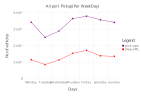

In [10]:
include("Graphs/JFKportperday.jl")

The following graph is the analysis of pick ups and drop offs with respect to daily hours (all days cumullitive).<br>
Some points which can be deduced from the graph is most of the flights are scheduled to leave from JFK at near<br>
about **6:00 AM and 3:00 PM**. Also this is also the time when significant amount of flights arrive at JFK airport.<br>
*(as these points corresponds to local maximum)*.<br>
Another feature which can be extracted is that late in night almost no flights are scheduled to take off from<br>
JFK but there are relatively more flights landing on JFK airport at late night.<br>
Also the decreasing drop offs at the airport after 3:00PM tells about the decreasing schedule of flights to<br> 
take off from JFK in nooon.<br>

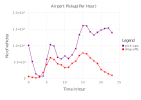

In [11]:
include("Graphs/JFKportperhour.jl")

In the following graph we have analysed the net influx of the people from *JFK Airport*. The influx has been defined as the difference between the *pickups* and *dropoffs*, offcourse this measure can not be taken as the exact number of the people entering NY on any given month, but it gives an idea about how many people had entered in that particular month.

An intersting feature that crops up is a shrap drop in the influx in the month of ***February 2014***, Investigation  about this led us to the winter storm that hit New York in *Feb'14*. This storm has been reported to be the *7th snowiest on record* in New york city.

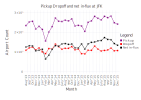

In [12]:
include("Graphs/netfluxJFK_graph.jl")

# * Card Vs. Cash*
From the available data we plotted the percentage of users who paid with cash and who paid with card in every month from 2013 to 2015. It can be seen clearly in the graph that the percentage of people paying through cards is steadily increasing and percentage of people paying through cosh is steadily decreasing.

The use of Card payment has grown from around 54% to 63% and cash payments have reduced proportionally.This could be due ease of payments that cards offer as compared to cash.

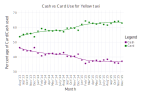

In [13]:
include("Graphs/mode_count_graph.jl")

It is intresting to note that people tend to tip much more when they pay by card.This could be attributed to the fact that online payment portal has tip option included and it is easier to transact with cards. 

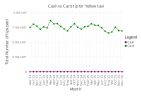

In [14]:
include("Graphs/tip_cash_card_graph.jl")

# *Regression of cost with distance and time*

We performed the regression on the cost, trip distance and the journey time at different time of day to come up with a regressive model to predict the cost of the journey on the basis of the distance of the journey anf the travel time. At different time in days the contribution of *time* in the model would be expected to vary hence we performed the regression after segregating the 24 hours in the buckets and performing regression on those buckets.

Here we present the crossection of the regression model obtained for the month of *january 2015* in the tine slot of 
*9:00AM to 12:00PM*. To visualise the variation with journey distance, journey time hass been kept constant and to visualise the variation with journey time, journey distance has been kept constant. An interesting feature which appears is that for vendor1 distance seems to play a dominant part in deciding cost rather than time and for vendor2 time seems to play a dominant part rather than distance. It seems both the vendor use different charging model.

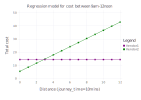

In [15]:
include("Graphs/vendor_regression_plot_time.jl")

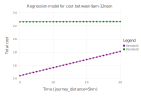

In [20]:
include("Graphs/vendor_regression_plot_dist.jl")

*A 3D plot of the regression model obtained for vendor1 in the above mentioned bucket : *

In [21]:
HTML("""
<img src="https://files.slack.com/files-pri/T0LL56A48-F3JJN9R4P/figure_1.jpg"></img>
""")

HTML{String}("<img src=\"https://files.slack.com/files-pri/T0LL56A48-F3JJN9R4P/figure_1.jpg\"></img>\n")